# [X-Village] Lesson 09 - Data Visualisation
## By 呂伯駿 (Po Chun)

在開始之前，幫我先寫下面那段程式碼，測試你有沒有裝一些待會要用的套件

In [103]:
# test.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('import success')
# 能印出 success 表示import 這些套件沒有問題，之後就可以把這個檔案砍掉了

import success


如果你有裝Anaconda，通常不會跳 "No module named ...."
如果有跳的話： 可以再裝一下這三個套件

In [ ]:
# 如果你有裝 Anaconda
conda install pandas numpy matplotlib

# 如果你沒有裝 Anaconda
pip install pandas numpy matplotlib

### 今天下午你應該會學到
- Pandas: 一種常用來處理資料的 package
- Matplotlib: 一種常用來做視覺化，繪製圖表的 package 
- numpy: 一種常用來做數學運算的package (數學運算上比原生python快)，這個在 AI 很常用。

這些 package 的基本用法

### 照慣例 有用過 pandas, numpy, Matplotlib 的舉手 ✋ ~

### ⚠ Alert

- 下午主要是介紹這三個常用的 Package 中常用的 Method，可能會有點瑣碎。
- 這些 Method 只要操作一次過有印象即可，不用真的背下來哪個是幹嘛用的，只要記得這個 package 有這個功能，怎麼寫忘記的話隨時再查即可。
- 個人是柱狀圖每次要畫的時候都會忘記要用什麼函式 💀。

## 開始! 🐌

<div style="text-align: center">
    <img src="https://i.imgur.com/fpyD2So.png">
</div>

## 1. Pandas 能做到什麼？
- 你在 excel 中能做到的大部分他都能做到
    - 匯入 CSV檔
    - 建立表格，選取欄位
    - 處理空值
    - 查看統計數字
    - 排序，計算欄位平均值，相關係數...
    - ...

#### 接下來你會學到
- pandas 的兩種常用物件
- 排序，合併，讀取數據，統計數字，空值處理

### 先安裝，如果剛才你沒有裝的話

In [ ]:
# 如果你有裝Anaconda，跑下面這一行
conda install pandas

# 如果你沒有裝Anaconda，跑下面這一行
pip install pandas

### 在使用之前，你需要先知道 pandas 有兩種物件

- Series：通常拿來處理一維資料，如時間序列。
- Dataframe：有點像Table，用來處理 csv 這種列有索引，欄有標籤的二維資料。

##### 其實還有第三種叫 Panel，通常處理三維的資料，但較少用因此這裡先不提。

### 先講 Series
#### 建立方式

In [13]:
import pandas as pd
# 若不加後面的index，則index預設是0,1,2,3...
pets = ['Labrador Retriever', 'Beagle', 'Dachshund', 'Shiba Inu']
pets_index = ['Alex', 'Alice', 'Neo', 'Kenny']
series_1 =  pd.Series(pets,index=pets_index)
print(type(series_1))
print(series_1)

<class 'pandas.core.series.Series'>
Alex     Labrador Retriever
Alice                Beagle
Neo               Dachshund
Kenny             Shiba Inu
dtype: object


In [37]:
# 資料選取方式
# 使用上，你可以使用index 或是 key name來選取
print(series_1[0])
print('-'*20)
print(series_1[[0,1,2]])
print('-'*20)
print(series_1['Alex'])
print('-'*20)
print(series_1[['Alex','Alice']])

Labrador Retriever
--
Alex     Labrador Retriever
Alice                Beagle
Neo               Dachshund
dtype: object
--
Labrador Retriever
--
Alex     Labrador Retriever
Alice                Beagle
dtype: object
--------------
Alice    Beagle
dtype: object
--------------
Neo      Dachshund
Kenny    Shiba Inu
dtype: object


In [41]:
# 也可以像這樣選取連續資料，因此說是序列的
print(series_1[1:2]) # 從第2個到第3個
print('-'*20)
print(series_1[:'Neo']) #從第一個 ~ Neo

Alice    Beagle
dtype: object
--------------
Alex     Labrador Retriever
Alice                Beagle
Neo               Dachshund
dtype: object


### Series 跟一般的list比起來有何好處？

In [13]:
# 1. 可以直接對兩個Series做加減乘除
price = pd.Series([15,20,40,10])
counts = pd.Series([1,3,5,6])
total_price = price*counts
print(total_price)

0     15
1     60
2    200
3     60
dtype: int64


#### 2. 運行速度快
同樣的存取動作會比 List 快十倍(之後附圖)

In [192]:
# resources: SITCON Pandas p8: https://drive.google.com/drive/u/0/folders/0B0UIQiTTYz0BWVJkOHJVVGNUNWs
import numpy as np
import pandas as pd

num_list = np.random.sample(1000000) # 隨機產生 100000 個數字的陣列, 這個陣列型態是 "numpy 陣列"
pd_series = pd.Series(num_list)
ori_list = list(num_list)  # 把 numpy 陣列轉變為一般 python 的陣列

# 用 傳統的 (for i in ori_list...) 來將兩個list的內容相加的運算時間會是用 pd_series + pd_series 來相加的 100倍

<class 'numpy.ndarray'>


### 接著講 Dataframe

#### 建立方式

In [48]:
import pandas as pd

pm25 = [55.4800251788,55.4800551787,55.4160551788,55.4300551788,55.2800551788]
pm10 = [81.6167142157,21.3467142857,81.5467144857,61.6467142857,31.7467142857]
dict = {'pm25': pm25,'pm10':pm10}
df = pd.DataFrame(dict)
print(df)

        pm10       pm25
0  81.616714  55.480025
1  21.346714  55.480055
2  81.546714  55.416055
3  61.646714  55.430055
4  31.746714  55.280055


In [165]:
# 如果你的資料本身已經是 二維矩陣 你也可以這樣建立
import pandas as pd

table = [
    [52.4800551788,83.6467142857],
    [51.4800551788,85.6467142857],
    [59.4800551788,87.6467142857],
    [55.4800551788,89.6467142857],
    [57.4800551788,80.6467142857]
]
df = pd.DataFrame(table,columns = ['pm25','pm10'])
print(df)
print('-'*20)
print(df['pm25'])
print('-'*20)
print(df.iloc[0,1]) # 選取第 1 列 (0)，第二欄(1)的數值
print('-'*20)
print(df.iloc[0:2,1]) # 選取第 1 ~ 2 列 (0:2)，第二欄(1)的數值

        pm25       pm10
0  52.480055  83.646714
1  51.480055  85.646714
2  59.480055  87.646714
3  55.480055  89.646714
4  57.480055  80.646714
--------------------
0    52.480055
1    51.480055
2    59.480055
3    55.480055
4    57.480055
Name: pm25, dtype: float64
--------------------
83.6467142857
--------------------
0    83.646714
1    85.646714
Name: pm10, dtype: float64


### pandas 能直接對資料做排序
透過 .sort_values 與 .sort_index 處理

In [146]:
import pandas as pd

table = [
    [52.4800551788,83.6467142857],
    [51.4800551788,85.6467142857],
    [59.4800551788,87.6467142857],
    [55.4800551788,89.6467142857],
    [57.4800551788,80.6467142857]
]
df = pd.DataFrame(table,columns = ['pm25','pm10'])
df.sort_values(by = 'pm25',ascending=False) # ascending 可調整升降冪

#axis=0 會根據最左側index進行排序, axis=1 會根據最上方欄位名稱(pm25, pm10)從左到右排序, ascending 可調整升降冪
# df.sort_index(axis=1, ascending=False) 

,pm25,pm10
2,59.480055,87.646714
4,57.480055,80.646714
3,55.480055,89.646714
0,52.480055,83.646714
1,51.480055,85.646714


### 也能夠合併兩組資料
可使用 
- .concat: 直接水平或垂直整併兩組資料
    - join: 若合併時發現資料有缺值，決定是建立一列新的資料或是忽略該資料
- .merge: 根據相同欄位內容來合併
- .append: 直接將數據增加為新的列 [參考](https://pandas.pydata.org/pandas-docs/stable/merging.html#concatenating-using-append)

In [154]:
# concat
import pandas as pd

table_1 = [
    [52.4800551788,83.6467142857],
    [51.4800551788,85.6467142857]
]
table_2 = [
    [59.4800551788,87.6467142857],
    [55.4800551788,89.6467142857],
    [57.4800551788,80.6467142857]
]
df_1 = pd.DataFrame(table_1,columns = ['pm25','pm10'])
df_2 = pd.DataFrame(table_2,columns = ['pm25','pm10'])
# axis=0 -> 合併時新增列, ignore_index=True 將會將最左側 index重置 (否則會是0,1,0,1,2)
df_3 = pd.concat([df_1, df_2], axis=0, ignore_index=True)

# 可以取消註解這行試試看igore=False, 最左邊的索引會怎麼跑
# df_3 = pd.concat([df_1, df_2], axis=0, ignore_index=False)

print(df_3)

        pm25       pm10
0  52.480055  83.646714
1  51.480055  85.646714
2  59.480055  87.646714
3  55.480055  89.646714
4  57.480055  80.646714


In [148]:
# join='outer'
import pandas as pd
import numpy as np

table_1 = [
    ['A', 'Noah', 90], ['B', 'Liam', 81], ['C', 'William', np.nan], ['B', 'Benjamin.', 82], ['A', 'Emma.', 90],
    ['C', 'Olivia', np.nan], ['A', 'Isabella', 70],
    ['C', 'Amelia', np.nan], ['B', 'Mia', 88],
]
table_2 = [
    ['Liam', 83], ['Benjamin.', 82], ['Emma.', 90], ['Olivia', 89], ['Isabella', 70],
    ['Amelia', 99], ['Mia', 88], ['new_person', 87],['Noah', 92], ['William', 76],
]
df_1 = pd.DataFrame(table_1,columns = ['class','name','math_score'])
df_2 = pd.DataFrame(table_2,columns = ['name','eng_score'])

# axis = 1 -> 合併時新增欄。
df_3 = pd.concat([df_1,df_2], axis=1, join='outer')
# join 預設會是 outer, 若設定inner 則 new_person 這筆資料會被移除
# df_3 = pd.concat([df_1,df_2], axis=1, join='inner')
print(df_3)

  class       name  math_score        name  eng_score
0     A       Noah        90.0        Liam         83
1     B       Liam        81.0   Benjamin.         82
2     C    William         NaN       Emma.         90
3     B  Benjamin.        82.0      Olivia         89
4     A      Emma.        90.0    Isabella         70
5     C     Olivia         NaN      Amelia         99
6     A   Isabella        70.0         Mia         88
7     C     Amelia         NaN  new_person         87
8     B        Mia        88.0        Noah         92
9   NaN        NaN         NaN     William         76


### 怎麼跟把同樣名子的學生資料也合併?

In [153]:
# 用 Merge
import pandas as pd
import numpy as np

table_1 = [
    ['A', 'Noah', 90], ['B', 'Liam', 81], ['C', 'William', np.nan], ['B', 'Benjamin.', 82], ['A', 'Emma.', 90],
    ['C', 'Olivia', np.nan], ['A', 'Isabella', 70],
    ['C', 'Amelia', np.nan], ['B', 'Mia', 88],
]
table_2 = [
    ['Liam', 83], ['Benjamin.', 82], ['Emma.', 90], ['Olivia', 89], ['Isabella', 70],
    ['Amelia', 99], ['Mia', 88], ['new_person', 87],['Noah', 92], ['William', 76],
]
df_1 = pd.DataFrame(table_1,columns = ['class','name','math_score'])
df_2 = pd.DataFrame(table_2,columns = ['name','eng_score'])

## 上面都一樣，從下面開始不一樣, 這裡的 inner 跟 outer 意義跟上上一頁的一樣，若放outer 會把有缺值的資料砍掉。
df_3 = pd.merge(df_1,df_2, on='name', how='inner')
print(df_3)

  class       name  math_score  eng_score
0     A       Noah        90.0         92
1     B       Liam        81.0         83
2     C    William         NaN         76
3     B  Benjamin.        82.0         82
4     A      Emma.        90.0         90
5     C     Olivia         NaN         89
6     A   Isabella        70.0         70
7     C     Amelia         NaN         99
8     B        Mia        88.0         88


merge 跟 concat 他還有一些不常用的參數，未來有時間有興趣可以自己看文件
[.concate 與 .merge 文件連結](https://pandas.pydata.org/pandas-docs/stable/merging.html)
<img src="https://i.imgur.com/s8VbLki.png">

### pandas 也可以直接從網路上讀取資料

In [57]:
# 臺南市健康促進醫院一覽表
url = 'http://data.tainan.gov.tw/dataset/1b89994d-ab2a-4126-ab1e-ed1a0cfaeb27/resource/f169b4d7-11d7-400e-b061-249cf9a2bf34/download/1070612tnhp.csv'
data = pd.read_csv(url, encoding='utf-8')
print(type(data))
# data.to_csv('file_name.csv') 這一行會把剛才的資料存成 csv 檔
data.head() # 取前幾行資料，如果你不是在jupyter notebook打這行外面要加 print

<class 'pandas.core.frame.DataFrame'>


,參與類別,機構名稱,機構地址,負責人,電話,緯度,經度
0,健康醫院認證,衛生福利部臺南醫院,臺南市中西區中山路125號,許博翔,06-2200055,22.996071,120.208878
1,健康醫院認證,衛生福利部新營醫院,臺南市新營區信義街73號,王裕煒,06-6351131,23.308923,120.313312
2,健康醫院認證,衛生福利部胸腔病院,台南市仁德區中山路864號,潘秋宜,06-2705911,22.973720,120.244054
3,健康醫院認證,衛生福利部嘉南療養院,台南市仁德區裕忠路539號,鄭靜明,06-2795019,22.976788,120.242017
4,健康醫院認證,台南市立醫院(委託秀傳醫療社團法人經營),台南市東區崇德路 670 號,戴芳楟,06-2609926,22.968706,120.226813


### 而 Pandas 也提供幾種常用的方法來查看你的資料

.shape: 回傳列，欄數。 e.g. (8,7) <br>
.info: 回傳資料 <br>
.describe(): 回傳統計數字 <br>
.columns: 回傳所有欄位名稱 
.index: 回傳索引值，如 0~8 <br>
.head(): 取前面幾行資料 <br>
.tail(): 取後面幾行資料 <br>

以上面的臺南市健康促進醫院一覽表為例 

In [34]:
data.info

<bound method DataFrame.info of      參與類別                  機構名稱              機構地址  負責人           電話  \
0  健康醫院認證             衛生福利部臺南醫院     臺南市中西區中山路125號  許博翔   06-2200055   
1  健康醫院認證             衛生福利部新營醫院      臺南市新營區信義街73號  王裕煒   06-6351131   
2  健康醫院認證             衛生福利部胸腔病院     台南市仁德區中山路864號  潘秋宜   06-2705911   
3  健康醫院認證            衛生福利部嘉南療養院     台南市仁德區裕忠路539號  鄭靜明   06-2795019   
4  健康醫院認證  台南市立醫院(委託秀傳醫療社團法人經營)    台南市東區崇德路 670 號  戴芳楟  06-2609926    
5  健康醫院認證        奇美醫療財團法人佳里奇美醫院  台南市佳里區興化里佳里興606號  周偉倪   06-7263333   
6  健康醫院認證       奇美醫療財團法人柳營奇美醫院    台南市柳營區太康里太康201號  黃順賢  06-622-6999   
7  健康醫院認證                  永川醫院     台南市中西區成功路169號  蘇祐達   06-2245771   

          緯度          經度  
0  22.996071  120.208878  
1  23.308923  120.313312  
2  22.973720  120.244054  
3  22.976788  120.242017  
4  22.968706  120.226813  
5  23.181669  120.183792  
6  23.289918  120.329240  
7  22.998097  120.206279  >

In [39]:
# 統計數據
data.describe()

,緯度,經度
count,8.000000,8.000000
mean,23.086737,120.244298
std,0.148580,0.051617
min,22.968706,120.183792
25%,22.976021,120.208228
50%,22.997084,120.234415
75%,23.208731,120.261369
max,23.308923,120.329240


### 有時(常常)外部拿到的資料會有空值(沒有給值)，Pandas 亦可以用來判斷資料是否存在空值，並加以處理
判斷空值:<br>
.isnull() <br>
.notnull() <br>

處理空值: <br>
.dropna() 把有空值的那一列資料砍掉<br>
.fillna() 用其他數值把空值補上

In [49]:
import numpy as np
import pandas as pd
# np.nan 是從 numpy 來的，意思是空值，這裡可以先不管他。
table = [
    ['A', 'Noah', 90],
    ['B', 'Liam', 81],
    ['C', 'William', np.nan],
    ['B', 'Benjamin.', 82],
    ['A', 'Emma.', 90],
    ['C', 'Olivia', np.nan],
    ['A', 'Isabella', 70],
    ['C', 'Amelia', np.nan],
    ['B', 'Mia', 88],
]
df = pd.DataFrame(table,columns = ['class','name','score'])

print(df['score'].isnull()) # 列出每一列是不是有空值

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8    False
Name: score, dtype: bool


In [4]:
import pandas as pd
import numpy as np
# np.nan 是從 numpy 來的，意思是空值。
table = [
    ['A', 'Noah', 90],
    ['B', 'Liam', 81],
    ['C', 'William', np.nan],
    ['B', 'Benjamin.', 82],
    ['A', 'Emma.', 90],
    ['C', 'Olivia', np.nan],
    ['A', 'Isabella', 70],
    ['C', 'Amelia', np.nan],
    ['B', 'Mia', 88],
]
df = pd.DataFrame(table,columns = ['class','name','score'])
new_df = df.fillna(df['score'].mean()) # 把空值用平均分數補上
# or new_df = df.fillna({'score': df['score'].mean()}) 也可以傳入字典來選擇 哪些欄位 要用 什麼資料 填補空值

print(new_df)

  class       name  score
0     A       Noah   90.0
1     B       Liam   81.0
2     C    William   83.5
3     B  Benjamin.   82.0
4     A      Emma.   90.0
5     C     Olivia   83.5
6     A   Isabella   70.0
7     C     Amelia   83.5
8     B        Mia   88.0


### Exercise 1.1 (計分練習)

嘗試透過閱讀 [pandas 文件](http://pandas.pydata.org/pandas-docs/stable/) or [Pandas 官方教學](https://pandas.pydata.org/pandas-docs/stable/10min.html#grouping)來了解 groupby 的用法，
並印出下列各班級的：
- 數學分數平均值 - - - (上面填空值時有用到平均值計算方法)
- 數學分數總和 - - - (A班平均多少，總分多少，B班平均...)
- 數學分數與英文分數的相關係數 - - - ( 可以 google 一下 pandas 算相關係數要用什麼 method。 hint: df.c???() )

<div style='color: white'>
    print(df.groupby(by='class').sum())<br>
    print(df.groupby(by='class').mean())<br>
    print(df.corr())
</div>

In [80]:
# sample code
table = [
    ['A', 'Noah', 90, 92],
    ['B', 'Liam', 81, 83],
    ['C', 'William', 87,85],
    ['B', 'Benjamin.', 82,80],
    ['A', 'Emma.', 90,94],
    ['C', 'Olivia', 50,60],
    ['A', 'Isabella', 70,71],
    ['C', 'Amelia', 84,86],
    ['B', 'Mia', 88,85],
]
df = pd.DataFrame(table,columns = ['class', 'name', 'math_score', 'eng_score'])
# print(something) # total score
# print(something) # mean score
# print(something) # correlation coefficient

### References

1. [Pandas doc](https://pandas.pydata.org/pandas-docs/stable/)
2. [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
1. [[Python] Pandas 基礎教學](https://oranwind.org/python-pandas-ji-chu-jiao-xue/)<br>
2. [Pandas 基本介绍](https://morvanzhou.github.io/tutorials/data-manipulation/np-pd/3-1-pd-intro/)<br>
3. [[資料分析&機器學習] 第2.3講：Pandas 基本function介紹](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-3%E8%AC%9B-pandas-%E5%9F%BA%E6%9C%ACfunction%E4%BB%8B%E7%B4%B9-series-dataframe-selection-grouping-447a3fa90b60)<br>
4. [SITCON Pandas!資料處理與分析的利器!](https://drive.google.com/drive/u/0/folders/0B0UIQiTTYz0BWVJkOHJVVGNUNWs)

<img src="https://i.imgur.com/AeoqHMX.png">

## 2. 接下來講 Matplotlib

他是一種用來資料視覺化的 python 套件，除了 Matplotlib之外，常見的還有 Seaborn。

- Matplotlib: 學習資源最多，繪圖功能最齊全
- Seaborn: 繪圖語法較簡單，圖表相較Matplotlib預設圖較好看。

#### 待會你會學到
- 如何用 Matplotlib畫出折線圖與散點圖
- 如何幫圖表加註解
- 嘗試根據 google stock 自己畫出有高低範圍的折線圖

### 你可以用 Matplotlib 畫出這些圖
<img src="https://i.imgur.com/GAP1OVL.png">
From [python-graph-gallery](https://python-graph-gallery.com/matplotlib/)

## Matplotlib 怎麼用？

### 一樣先安裝，如果你剛才沒有裝的話

In [ ]:
# 如果你有裝Anaconda，跑下面這一行
conda install pandas

# 如果你沒有裝Anaconda，跑下面這一行
pip install pandas

### Example 2.1，折線圖與散點圖

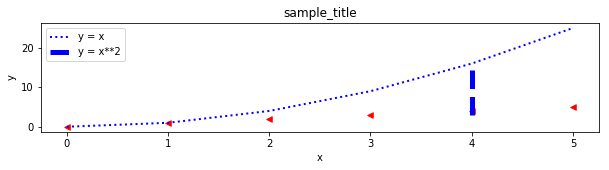

In [56]:
# 下面這一行 %matplotlib inline 的目的是讓matplotlib畫出的圖片能直接在 jupyter notebook 顯示，如果你在VS code加這行是沒有用的。 
# 相對的，你在 VS code 執行時，圖片會直接跳出來。
%matplotlib inline
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5]
y1 = [0,1,2,3,4,5]
y2 = [0,1,4,9,16,25]

plt.figure(figsize=(10, 2)) # 圖片尺寸 10*6
# 這一行能畫散點圖,  s是點的尺寸, marker 是點的形狀
plt.scatter(x,y1, s=30, c='red', marker='<')
# 這一行能畫折線圖， linestyle是點的
plt.plot(x, y2, color='blue', linewidth=2.0, linestyle=':')
# 下面這一行也是畫線用，座標從 [4,4] 到 [3,16] 
plt.plot([4, 4], [3, 16], 'b--', linewidth=5)  # b-- => color:blue & linestyle:'--'

plt.xlabel('x')
plt.ylabel('y')
plt.legend(["y = x", "y = x**2"], loc=2); # loc指的是legend要放的位置，loc=2是放在第二象限
plt.title('sample_title');
plt.show() # 要把圖片顯示出來記得加這一行

### Example 2.2，註解與連結線上資料

In [58]:
# 取得 Google 股價資料
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
url = 'http://markets.financialcontent.com/stocks/action/gethistoricaldata?Month=12&Symbol=GOOG&Range=300&Year=2017'
google_stock = pd.read_csv(url)
google_stock.head()

,Symbol,Date,Open,High,Low,Close,Volume,Change,% Change
0,GOOG,12/29/17,NaN,1046.0,1046.0,1046.0,0,-1.74,-0.17%
1,GOOG,12/28/17,1052.0,1055.0,1045.0,1048.0,834645,-1.23,-0.12%
2,GOOG,12/27/17,1057.0,1058.0,1048.0,1049.0,1271896,-7.37,-0.70%
3,GOOG,12/26/17,1058.0,1060.0,1050.0,1057.0,761208,-3.38,-0.32%
4,GOOG,12/22/17,1061.0,1064.0,1059.0,1060.0,755095,-3.51,-0.33%


(946, 9)


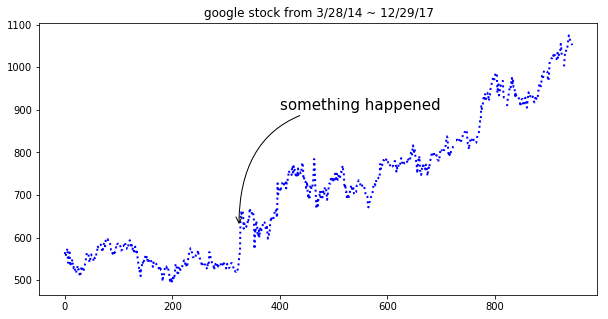

In [211]:
# 因為收到的資料是從 12/29/17 開始到 03/28/14，因此要轉個方向變成3/28/14到12/29/17。
new_google_stock = google_stock.iloc[::-1]
plt.figure(figsize=(10, 5))
print(new_google_stock.shape) # 確認這資料有幾欄，幾列

x = range(0,new_google_stock.shape[0]) # [0,1,2...,945] # 產生 x 座標用
y = new_google_stock['Open'] # 取得 Open 那一欄的所有資料，用來當 y 座標。
plt.plot(x, y, color='blue', linewidth=2.0, linestyle=':') # 畫折線圖，因為 linestyle 設定為 ':' 所以會是一堆點
# .annotate 是畫那條箭頭線用的， 
# connectionstyle: 曲線角度 參考：https://matplotlib.org/2.0.2/api/patches_api.html#matplotlib.patches.ConnectionStyle
# xytext 指的是要將文字放在座標軸的哪裡。
plt.annotate(
    s='something happened', xy=(324, 627), xytext=(400, 900), fontsize=15,
    arrowprops={'arrowstyle':'->', 'connectionstyle': "angle3,angleA=0,angleB=90"}
)
plt.title('google stock from 3/28/14 ~ 12/29/17');
plt.show()

## Exercise 2.1 (計分)

請透過閱讀 [Matplotlib 文件](https://www.google.com.tw/search?rlz=1C5CHFA_enTW728TW728&ei=8_hIW_nKI5Ci-Qa24LzwDw&q=fill+between+matplotlib&oq=fill+between+matplotlib&gs_l=psy-ab.3..35i39k1j0l2j0i22i30k1l7.2401.2532.0.2991.2.2.0.0.0.0.115.190.1j1.2.0....0...1c.1.64.psy-ab..0.2.190....0.tyqgTUaRDkg)，了解 fill_between 的用法後，嘗試補充下一頁的sample code，用google股價繪出下圖
底色區域的上邊界是 high price, 下邊界是 low price, 中間線是 open price。<br>
*顏色不用一樣沒關係，下一頁有 sample code，只要把那兩行 TODO 的內容修改即可<br>


Hint: 真的找/想不到的話，可反白這句後面 <span style='color:white'>你要用 plt.fill_between 畫底色區域(參數有x,y1,y2)，再用plot 畫中間那條線</span>

References: [Gallery_1](https://matplotlib.org/gallery.html#lines_bars_and_markers), [Gallery_2](https://matplotlib.org/gallery/index.html), [Gallery_3](https://python-graph-gallery.com/)<br>
如果畫完的話，可以看看上面的 Gallery 來看各種神奇的圖表的畫法。 或是了解一下 subplot (畫子圖片)的用法
<img src="https://i.imgur.com/Wf312W1.png">
<p style='color:white'>
    plt.fill_between(range(0,new_google_stock.shape[0]),new_google_stock['High'],new_google_stock['Low'])
    plt.plot(range(0,new_google_stock.shape[0]), new_google_stock['Open'], color='b')
</p>

In [104]:
# ex2.1 的 Sample code
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
url = 'http://markets.financialcontent.com/stocks/action/gethistoricaldata?Month=12&Symbol=GOOG&Range=300&Year=2017'
google_stock = pd.read_csv(url)
new_google_stock = google_stock.iloc[::-1] # 因為收到的資料是從 12/29/17 開始到 03/28/14，因此要轉個方向變成3/28/14到12/29/17。
new_google_stock = new_google_stock[:30] # 為了讓上下間距區域變明顯，我們只看前面30天的資料

plt.figure(figsize=(10, 5))
# TODO: magic!
# TODO: another magic!
plt.show()

<Figure size 720x360 with 0 Axes>

### References
- [matpliblib Tutorials](https://matplotlib.org/tutorials/index.html)
- [Matplotlib 教學](https://morvanzhou.github.io/tutorials/data-manipulation/plt/1-1-why/)

<img src="https://i.imgur.com/yTm4dbk.png">

## 3. 那 numpy 又是幹嘛的？

- 方便做高維矩陣的數值運算，也有提供其他科學計算的函式。 其實常跟 pandas一起用
- AI 領域常用

### 接下來你會知道如何用 numpy：
- 生成數列或隨機值
- 建立一個 m \* n 的矩陣，再把這矩陣改成 n \* m 或 1 * z,
- 把兩個矩陣 m*n 矩陣組合起來，變成 2m*n 或 m*2n，或是把一個矩陣切成多個
- 一些常用的數學運算，如 dot, log...

### ⚠ Alert

如果你之後沒有要接觸 AI, 且矩陣運算對你來說很遠的話，那下面的內容聽聽就好 👍

### 生成隨機數列與矩陣

In [81]:
import numpy as np
list_1 = np.arange(0,10,2)    # 生成 0~10, 間隔為 2 的數列
list_2 = np.random.sample(5)  # 隨機生成 5 個數字
print(list_1)
print(list_2)
array_1 = np.random.choice(list_2, (4,3)) # 從 list_1 隨機抽數字來建立 4 * 3 的矩陣
print(array_1)

[0 2 4 6 8]
[ 0.50716423  0.3895441   0.05644316  0.4718844   0.29993954]
[[ 0.29993954  0.4718844   0.05644316]
 [ 0.29993954  0.3895441   0.3895441 ]
 [ 0.05644316  0.29993954  0.4718844 ]
 [ 0.3895441   0.4718844   0.4718844 ]]


### 建立矩陣
numpy 有自己的array資料型態方便計算。

In [28]:
import numpy as np
array_1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
array_2 = np.array([[1+1j,2+2j],[3+3j,4+4j]], dtype=complex)  # 生成複數矩陣
array_3 = np.zeros((4,3)) # 生成 4*3, 每個element是 1 的矩陣
array_4 = np.ones((3,4))  # 生成 3*4, 每個element是 1 的矩陣
array_5 = np.eye(3)     # 生成 n階單位矩陣
print(array_2)
print(array_5)
print(array_5.ndim)  # 幾維矩陣
print(array_5.shape) # x * y 矩陣
print(array_5.size)  # 可以觀察用途為何

[[ 1.+1.j  2.+2.j]
 [ 3.+3.j  4.+4.j]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
2
(3, 3)
9


### 改變矩陣

In [82]:
import numpy as np
array_1 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(array_1.shape)
print(array_1.reshape((2,6)))  # 改變矩陣維度, 注意他跟 .resize() 會有差異
print(array_1.swapaxes(0,1))   # 維度交換
print(array_1.flatten())

(4, 3)
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


### 矩陣的組合
- np.vstack # 合併兩陣列，增加列
- np.hstack # 合併兩陣列，增加欄
- np.concatenate() # 合併多陣列
- np.newaxis() # 增加矩陣維度用, 一維變二維，二維變三維...

In [166]:
A = np.zeros((1,3))
B = np.ones((1,3))
C = np.array([[3,4,5]])
print(np.vstack((A,B))) # 合併增加列
print(np.hstack((A,B))) # 合併增加欄
print('-'*20)
print(np.concatenate((A,B,C,B), axis=0))
print(np.concatenate((A,B,C,B), axis=1))

[[ 0.  0.  0.]
 [ 1.  1.  1.]]
[[ 0.  0.  0.  1.  1.  1.]]
--------------------
[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 3.  4.  5.]
 [ 1.  1.  1.]]
[[ 0.  0.  0.  1.  1.  1.  3.  4.  5.  1.  1.  1.]]


In [194]:
# newaxis 的用法
D_1 = np.array([1,2,3,4]) # 一維陣列
print(D_1.shape)

D_2 = D_1[:, np.newaxis]
print(D_2) # 變成 4*1的矩陣了
print(D_2.shape) 

print('-'*20)
D_3 = D_1[np.newaxis,:]
print(D_3) # 變成 1*4 的矩陣了
print(D_3.shape) 


(4,)
[[1]
 [2]
 [3]
 [4]]
(4, 1)
--------------------
[[1 2 3 4]]
(1, 4)


### 矩陣的分割
- np.split: 平均分割
- np.array_split: 不等量分割

In [188]:
import numpy as np

array_1 = np.arange(12).reshape(3,4)

array_2 = np.split(array_1, 2, axis=1)       # 縱向切成 兩個 3*2 矩陣
array_3 = np.array_split(array_1, 3, axis=1) # 縱向切成 3份，第一個會有 (4//3 + 1) = 2欄，其餘的是 4//3 = 1欄
print(array_1)
print(array_2)
print(array_3)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]])]


### 常見運算

- np.sqrt()
- np.log()
- np.abs()
- np.sin()
- np.dot()
- np.max([1,2,3,4])
- ... 還有很多，要用時再查即可。 後續有需要的話也可以 google numpy 要怎麼取得 特徵值跟特徵向量，或反矩陣與轉置矩陣。

### Exercise 3.1 (不計分)

請嘗試畫出 y = exp(x), x為將0~1中間取成5份的數組 (x = [0,0.25,0.5,0.75,1]) 的長條圖(柱狀圖)。

請嘗試搜尋出:
- 怎麼用 numpy 算 exp (跟上一頁的常見運算方式很像)
- 能夠將 兩數值中間切分成 n 份並回傳數列的 numpy 的模組  hint: np.lin????e()
- matplotlib畫長條圖的方式

<img src="https://i.imgur.com/NgmPxSb.png">

In [83]:
# sample code
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# x = np.lin????e(?,?,?)
# y = np.?x?(x)
# plt.???(x,y)
plt.show()

## Reserences
- [Numpy & Pandas 教程 莫煩Python](https://morvanzhou.github.io/tutorials/data-manipulation/np-pd/)
- [Numpy Doc](https://docs.scipy.org/doc/)
- [Numpy tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)

### 延伸學習
- [以-jieba-與-gensim-探索文本主題-五月天人生無限公司歌詞分析](https://medium.com/pyladies-taiwan/%E4%BB%A5-jieba-%E8%88%87-gensim-%E6%8E%A2%E7%B4%A2%E6%96%87%E6%9C%AC%E4%B8%BB%E9%A1%8C-%E4%BA%94%E6%9C%88%E5%A4%A9%E4%BA%BA%E7%94%9F%E7%84%A1%E9%99%90%E5%85%AC%E5%8F%B8%E6%AD%8C%E8%A9%9E%E5%88%86%E6%9E%90-i-cd2147b89083)

### 記得宣布作業二

[作業二連結](https://hackmd.io/xIwrIqx6SmqBnqJFr_smEw?view)
<img src="https://i.imgur.com/Q5YWzOR.png">